In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='talk', style='ticks')

### Helper functions for cleaning data

In [2]:
def d1_id(df):    # helper function to get the index when Mass density = 1.0
    return df[df['Mass density']==1.0].index.tolist()[0]
#d1_id(EGS)

def n_r(df, raw_col = 'Raw_data_col', norm_col = 'Normalised_data_col'): # norm and return, pass the dataframe, column to normalise and drop, and the norm col name
    if raw_col in df.columns:
        df[norm_col] = df[raw_col]/df[raw_col].iloc[d1_id(df)]
        df = df.drop(raw_col, 1) 
        return df

# EGS = n_r(EGS, raw_col = 'EGS_Dose', norm_col = 'EGS_Dose_norm')

In [3]:
ECLIPSE = pd.read_csv("Eclipse_data_19_10.csv")  # index_col=[0]
ECLIPSE = n_r(ECLIPSE, raw_col = 'AAA (Gy) point', norm_col = 'AAA')
ECLIPSE = n_r(ECLIPSE, raw_col = 'AXB Dw (Gy) point', norm_col = 'AXB Dw')
ECLIPSE = n_r(ECLIPSE, raw_col = 'AXB Dm (Gy) point', norm_col = 'AXB Dm')
df = ECLIPSE
#df

In [4]:
df=df.set_index(['Mass density'])

In [5]:
metrics_ = [ 'AAA', 'AXB Dw', 'AXB Dm', 'CCC', 'EGS']
df['Mean'] = df.loc[:,metrics_].mean(axis=1)   # apply mean by row
df['Max'] = df.loc[:,metrics_].max(axis=1)   # apply mean by row
df['Min'] = df.loc[:,metrics_].min(axis=1)   # apply mean by row

df['Max % error'] = df.loc[:,'Max']   # apply mean by row

In [6]:
df['Max % error'] = 100.0*(df['Max'] - df['Min'])/df['Min']   # apply mean by row

In [7]:
df2 = df[['VOI Material', 'Proton Stp PWR','CT number', 'AAA', 'AXB Dw', 'AXB Dm', 'Max', 'Mean', 'Max % error']]   # 'CCC', 'EGS', rearrange, , 'Elect density', 'Proton Stp PWR', 'Min', 'Max',  
df2 = df2.rename(columns={'Proton Stp PWR': 'Stp PWR'})
df2

,VOI Material,Stp PWR,CT number,AAA,AXB Dw,AXB Dm,Max,Mean,Max % error
Mass density,,,,,,,,,
0.00,Air,0.0073,-993,1.033987,1.048493,0.908257,1.048493,0.996912,15.440115
0.26,Lung,0.2699,-734,1.013072,1.023591,1.022280,1.023591,1.019648,1.038346
0.92,Adipose tissue,0.9421,-105,1.005229,0.979030,0.998689,1.005229,0.994316,2.675976
1.00,Water,1.0100,0,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1.04,Epoxy,1.0389,38,1.000000,1.019659,0.944954,1.019659,0.988204,7.905687
1.05,Muscle skeletal,1.0483,48,1.000000,1.002621,0.988204,1.002621,0.996942,1.458886
1.10,Cartilage,1.0855,128,0.994771,1.007864,0.982962,1.007864,0.995199,2.533333
1.19,PMMA,1.1617,282,0.994771,0.992136,0.960682,0.994771,0.982530,3.548494
1.30,Radel,1.2548,470,0.994771,1.022280,0.929227,1.022280,0.982093,10.014104


In [8]:
#df2.to_csv('ALL_DATA_8_3_2017.csv', index=False)  # write to file

In [9]:
df2['VOI Material'].values

array(['Air', 'Lung', 'Adipose tissue', 'Water', 'Epoxy',
       'Muscle skeletal', 'Cartilage', 'PMMA', 'Radel', 'PEEK', 'PVC',
       'Acetal', 'PVDF', 'Bone', 'PTFE', 'Aluminium', 'Titanium alloy'], dtype=object)

In [14]:
EGS = pd.read_csv("EGS_data_19_10.csv", index_col=[0])  # 

C:\Users\RCole02.ROYALSURREY\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\legend.py:325: UserWarning: Unrecognized location "top left". Falling back on "best"; valid locations are
	best
	lower right
	right
	center
	center left
	upper center
	upper right
	upper left
	lower left
	lower center
	center right

  six.iterkeys(self.codes))))


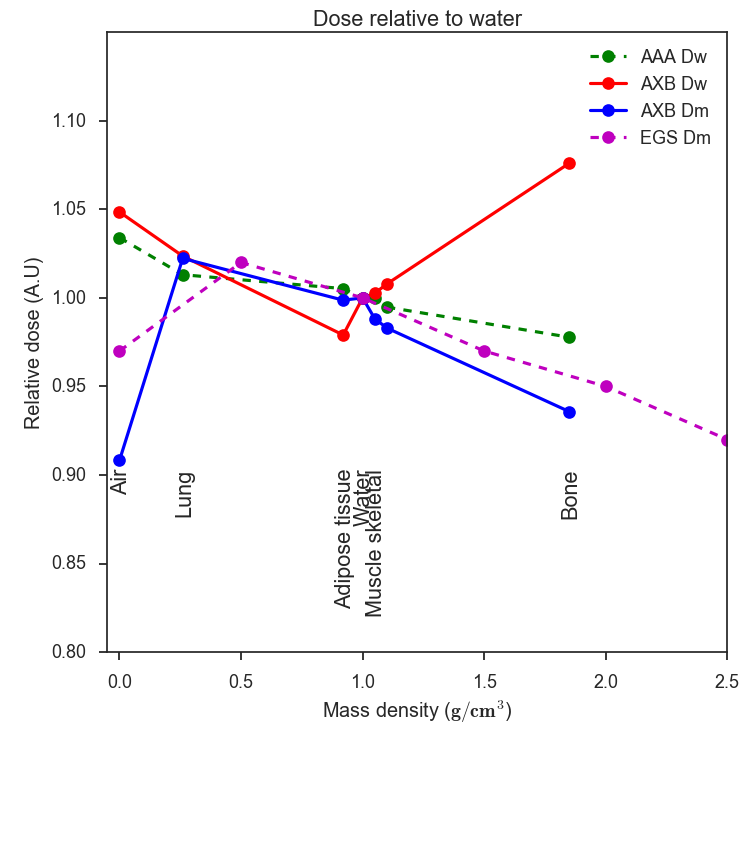

In [67]:
width = 8
height = 8
annotation_height = 0.895
annotation_x_offset = -.035
plt.figure(figsize=(width, height))  # width, height

if False:
    df = df2
else:    # plot only biological?
    df = df2.iloc[[0,1,2,3,5,6,13]]

plt.plot(df[['AAA']], c='g', marker='o', label='AAA Dw', ls='--')
plt.plot(df[['AXB Dw']], c='r', marker='o', label='AXB Dw')
plt.plot(df[['AXB Dm']], c='b', marker='o', label='AXB Dm')
plt.plot(EGS['EGS_Dose_norm'], c='m', marker='o', label='EGS Dm', ls='--')

for i, txt in enumerate(df2['VOI Material'].values):
    if txt in ['Air', 'Lung', 'Adipose tissue', 'Muscle skeletal','Bone', 'Aluminium', 'Water']:   # 'Adipose tissue',   'PVC', 
   # if txt in df2['VOI Material'].values:    
        plt.annotate(txt, (df2['Max'].index.values[i]+annotation_x_offset, annotation_height), rotation=90)  # df2['Max'].values[i]

axes = plt.gca()
axes.set_xlim([-0.05,2.5]) # min and max
axes.set_ylim([0.8,1.15])

plt.xlabel(r'Mass density ($\mathbf{g/cm^{3}}$)')
plt.ylabel('Relative dose (A.U)')
plt.title('Dose relative to water')

plt.tick_params(top='off', right='off')      # ticks along the bottom edge are off

plt.legend(shadow=True, fontsize='small', loc='top left') ,
#plt.grid(True)
#plt.savefig('Fig1.png' , dpi=500);#, format='pdf'
plt.show();

In [66]:
df2.iloc[[0,1,2,3,5,6,13]]

,VOI Material,Stp PWR,CT number,AAA,AXB Dw,AXB Dm,Max,Mean,Max % error
Mass density,,,,,,,,,
0.00,Air,0.0073,-993,1.033987,1.048493,0.908257,1.048493,0.996912,15.440115
0.26,Lung,0.2699,-734,1.013072,1.023591,1.022280,1.023591,1.019648,1.038346
0.92,Adipose tissue,0.9421,-105,1.005229,0.979030,0.998689,1.005229,0.994316,2.675976
1.00,Water,1.0100,0,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1.05,Muscle skeletal,1.0483,48,1.000000,1.002621,0.988204,1.002621,0.996942,1.458886
1.10,Cartilage,1.0855,128,0.994771,1.007864,0.982962,1.007864,0.995199,2.533333
1.85,Bone,1.7303,1430,0.977778,1.076016,0.935780,1.076016,0.996524,14.985994
